## What is the Best Machine Learning Model to Predict Survival of Patients with Heart Failure?

In [ ]:
# Import libraries, read data file, and display dataframe

import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

heart_disease = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/heart_disease_clinical_data.csv"

df = pd.read_csv(heart_disease)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Data Exploration

**Question 1**: How many rows of data do we have? Do we have any missing data?

In [ ]:
# Find out more about dataframe's dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Answer**: There are 299 rows of data. There are no missing data values. All columns are either in float64 or int64 dtype. There are no objects or strings. 

**Question 2** 

What is the frequency distribution for each feature?

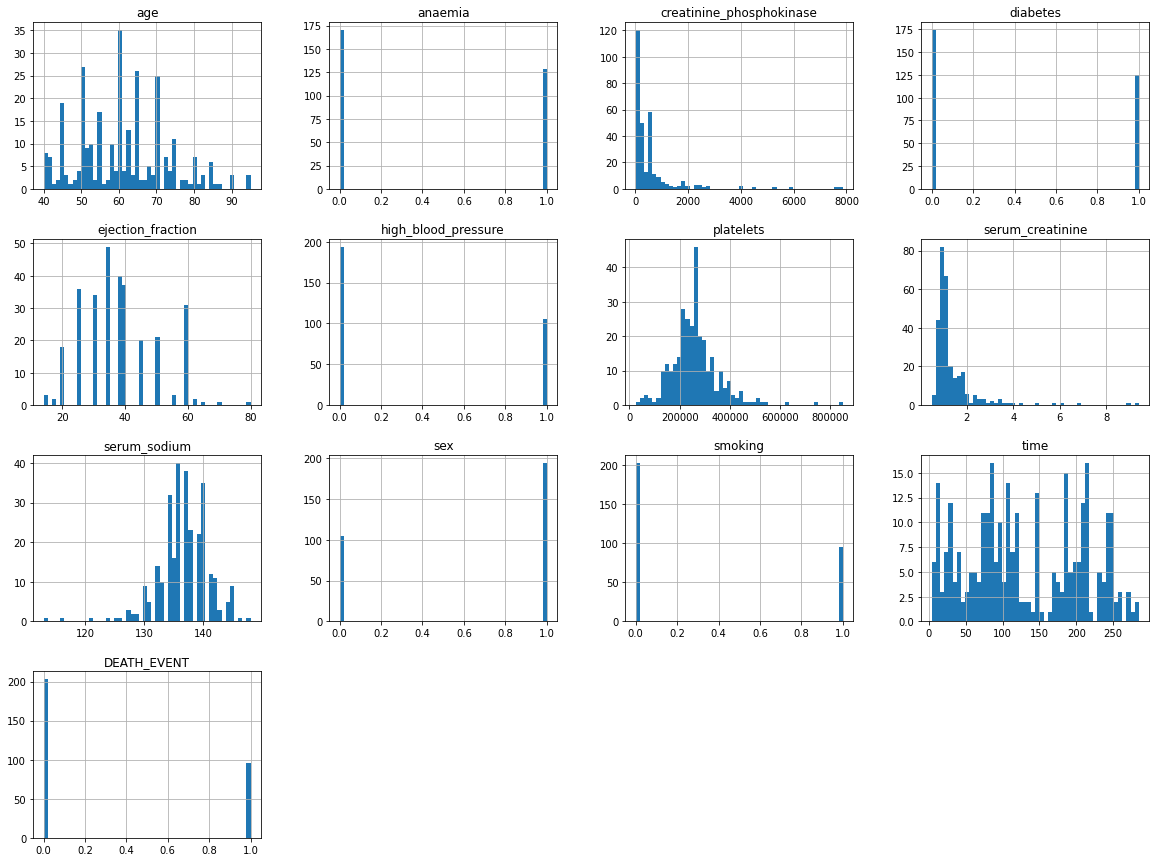

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Answer**: 

These histograms are a useful visual interpretation of numerical data for each feature. `Age` and `time` have the most variance. `Platelets` and `serum_sodium` show a small resemblance to a normal distribution. 

The histogram is also useful to visualize the categorial features - ones that only show boolean values. We can use these histograms to see which category is the most frequent. For instance, `sex` shows a higher number of women than men (1 is more frequent than 0). `smoking` shows a higher number of smokers than non-smokers (0 is more frequent than 1). 

**Question 3**: Are there any correlations between the clinical features? If so, what are they?

In [ ]:
corr_matrix = df.corr()
corr_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


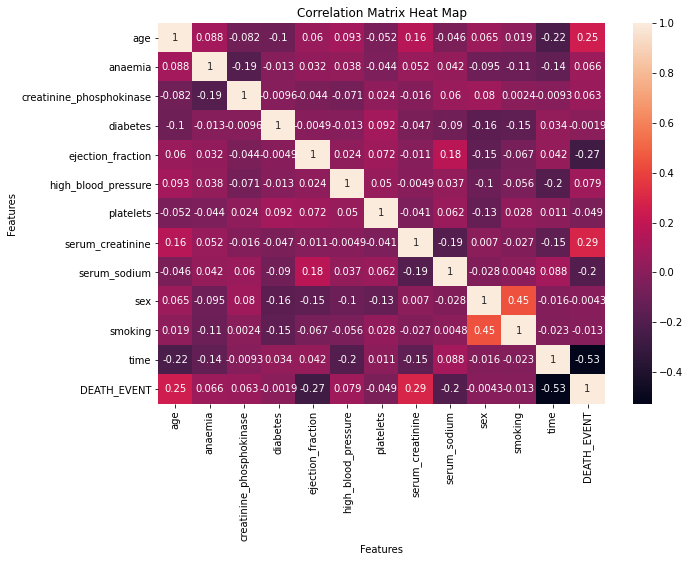

In [ ]:
# Use a heat map for better visualization
# Set the width and height of the figure
plt.figure(figsize=(10,7))

plt.title("Correlation Matrix Heat Map")

sns.heatmap(data=corr_matrix, 
            annot=True
           )
# Add label for axes
plt.xlabel("Features");
plt.ylabel("Features");

**Answer**: 

This heat map is useful for distinguishing which features have the highest correlation. There appears to be a positive correlation between:

1. `sex` and `smoking`: 0.45 (i.e men smoke more often than women)
1. `serum_creatinine` and `DEATH_EVENT`: 0.29
1. `age` and `DEATH_EVENT`: 0.25
1. `time` and `serum_sodium`: 0.088

There appears to  be a negative correlation between:
1. `time` and `DEATH_EVENT`: -0.53
1. `ejection_fraction` and `DEATH_EVENT`: -0.27
1. `time` and `age`: -0.22
1. `time` and `high_blood_pressure`: -0.2
1. `time` and `serum_creatinine`: -0.15

**Question 4**: What is the relationship between the following numeric features: `age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, `serum_sodium`, and `time`? 	

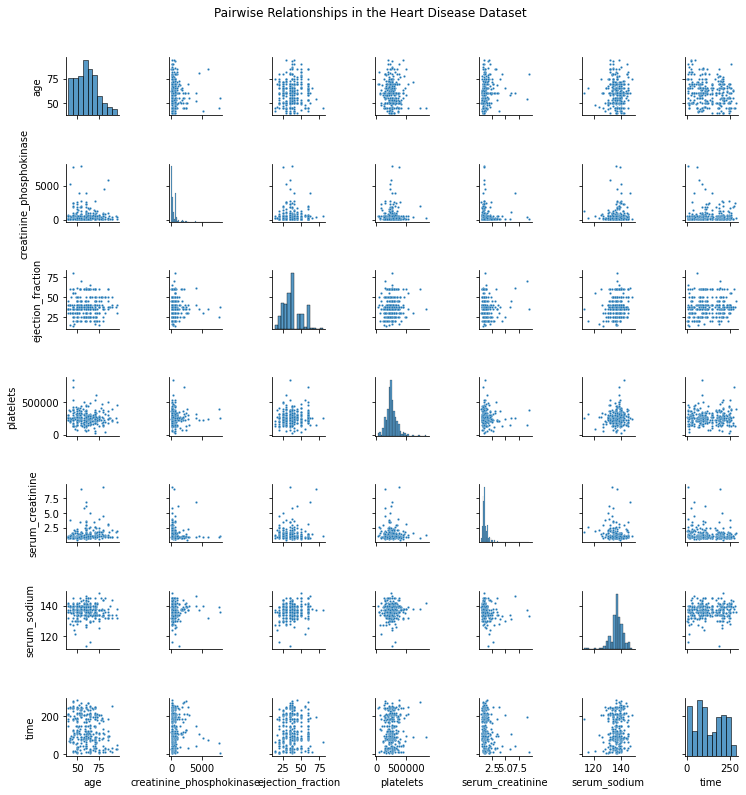

In [ ]:
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

numeric_df = df[numeric_cols]

g=sns.pairplot(
    data=numeric_df,
    plot_kws={"s":5},  
    height=1.5 
);
g.fig.suptitle(
    "Pairwise Relationships in the Heart Disease Dataset ", y=1.05
);

**Answer**: 

Pairwise plots are useful for visualizing the relationship between any two variables of the dataset. 

The results here show that none of the plots have a clear positive correlation or a clear negative correlation. The plots mostly show scattered datapoints. The pairwise plot might not be the best plot for this dataset. 

**Question 5**: Which numeric category has the highest variance with `DEATH_EVENT`? 

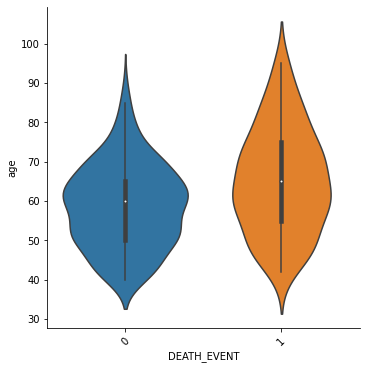

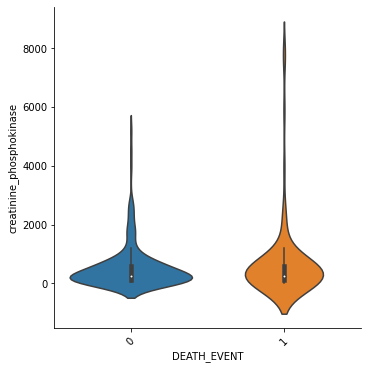

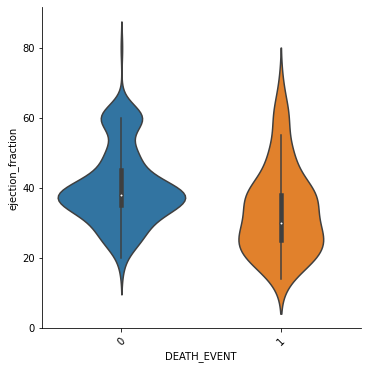

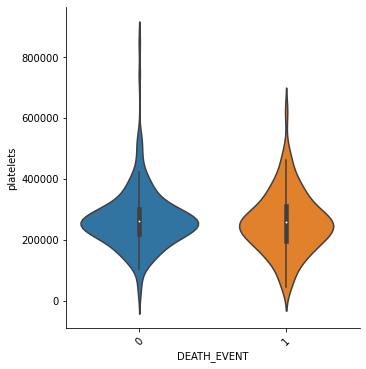

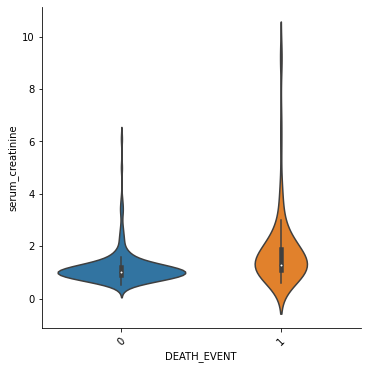

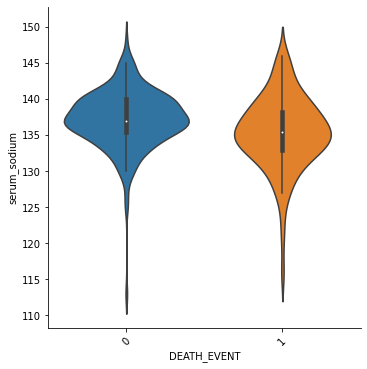

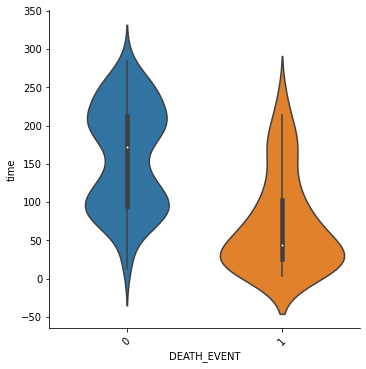

In [ ]:
for col in numeric_cols:
  p = sns.catplot(
      data=df,
      x='DEATH_EVENT',
      y=col,
      kind="violin"
  )


  p.set_xticklabels(rotation=45)
  plt.show()


**Answer**: 

`Time` and `age` have the highest variance between the two classes.

`Ejection_fraction` and `serum_creatinine` are second after `time` and `age`. They also have a high variance between classes.

**Question 6**: How do `serum_creatinine` and `ejection_fraction` correlate with `DEATH_EVENT`? 

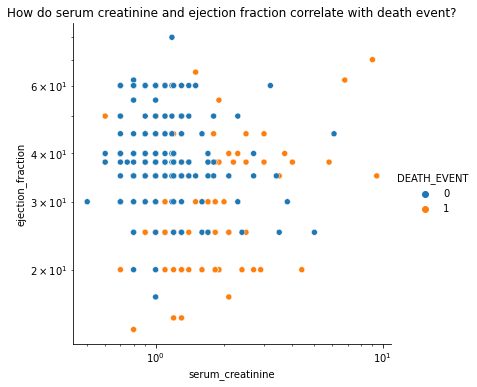

In [ ]:
rp = sns.relplot(
    data=df,
    x="serum_creatinine",
    y="ejection_fraction",
    hue="DEATH_EVENT"
)

rp.ax.set(xscale="log", yscale="log")
plt.title("How do serum creatinine and ejection fraction correlate with death event?");

**Answer**: There does appear to have a relationship between `ejection_fraction` and `serum_creatinine`. When plotted on a log-log scale, a blue "island" of survivors becomes apparent with low `serum_creatinine` and `ejection_fraction` between 30 and 60. There are also scattered pockets where most datapoints correspond to deaths. The combination of these two features could be useful for classification.

# Preparing the data for transformation

**Create a train-test split**

We'll create a 80%-20% train-test split. We should note that given the small size of our data, this makes both sets rather small. 

To reduce biases in our split, we'll stratify by age. We can simply bucket age by 10's to produce a smooth distribution.

In [ ]:
# Preparing the data

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import numpy as np

# Group `age` into bins
df['age_bins'] = pd.cut(df['age'],
                        bins=[0, 40, 50, 60, 70, 80, 90, np.inf],
                        labels=[1, 2, 3, 4, 5, 6, 7])

# Use stratified sampling to create training and testing datasets
# Stratify on 'age' because it has one of the highest variances
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['age_bins']):
    strat_train_set = df.loc[train_index].drop('age_bins', axis=1)
    strat_test_set = df.loc[test_index].drop('age_bins', axis=1)
strat_train_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
73,65.0,0,224,1,50,0,149000.00,1.3,137,1,1,72,0
233,53.0,1,707,0,38,0,330000.00,1.4,137,1,1,209,0
77,42.0,0,102,1,40,0,237000.00,1.2,140,1,0,74,0
179,55.0,0,835,0,40,0,279000.00,0.7,140,1,1,147,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,55.0,0,336,0,45,1,324000.00,0.9,140,0,0,74,0
234,53.0,1,582,0,45,0,305000.00,1.1,137,1,1,209,0
224,58.0,0,582,1,25,0,504000.00,1.0,138,1,0,205,0
245,61.0,1,80,1,38,0,282000.00,1.4,137,1,0,213,0


In [ ]:
# replace name of death event column with 'label'
df_train = strat_train_set.drop('DEATH_EVENT', axis=1)
df_train_labels = strat_train_set['DEATH_EVENT'].copy()

**Preparing Training Dataset**

Since the dataset is very small, it is worthwhile to reduce the number of features in the dataset for improving accuracy in the training set later. 

Hence, I picked features that had the highest correlation from the data exploration work from above. 

In [ ]:
# Select the features to use
num_attribs = ['age', 'time', 'serum_creatinine', 'ejection_fraction']
cat_attribs = ['high_blood_pressure', 'sex', 'smoking']

In [ ]:
# Add custom feature
from sklearn.base import BaseEstimator, TransformerMixin

# Make a ratio of 'serum_creatinine' and 'ejection_fraction'

# Get column indices for attributes of interest
creatinine_idx, ejecfrac_idx = [list(df[num_attribs].columns).index(col) for col in ('serum_creatinine', 'ejection_fraction')]

# Create custom transformer class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  
  def transform(self, X, y=None):
    creatinine_ejecfrac_ratio = X[:, creatinine_idx] / X[:, ejecfrac_idx]
    return np.c_[X, creatinine_ejecfrac_ratio]

# Testing additional attributes
attr_adder = CombinedAttributesAdder()

In [ ]:
# Build pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),            # fill in missing values with median
        ('attr_adder', CombinedAttributesAdder()),                # add in additional attribute
        ('std_scaler', StandardScaler()),                         # feature scaling
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),     # fill in missing values with most frequent
        ('one_hot', OneHotEncoder(handle_unknown='ignore')),      # one hot encoding
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

# df_transformed is the full feature set. Now ready to use.
df_transformed = full_pipeline.fit_transform(df_train)

# The arrays passed to models.
X = df_transformed
y = df_train_labels
assert(X.shape[0] == y.shape[0])

# Train and Evaluate on the Training Set

In [ ]:
def train_and_evaluate_model(model, X_train, y_train):
  """Cross-validates, trains, and gets training accuracy for the given model."""

  # Cross-validate (k-fold cross validation)
  print("5-fold Cross-Validation...")
  scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv=5)
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

  # Train the model
  print("\nTraining Model on all training data...")
  model.fit(X_train, y_train)

  # Training accuracy
  print("Predicting using training set...")
  y_pred = model.predict(X)
  print("")
  print("Classification report (training set):")
  print(classification_report(y, y_pred))

In [ ]:
# First train a logistical regression model
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

LR = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr')
train_and_evaluate_model(LR, X, y)

5-fold Cross-Validation...
Scores: [0.875      0.85416667 0.8125     0.875      0.76595745]
Mean: 0.8365248226950355
Standard deviation: 0.04202108956477515

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       159
           1       0.79      0.70      0.74        80

    accuracy                           0.84       239
   macro avg       0.82      0.80      0.81       239
weighted avg       0.83      0.84      0.83       239



**Logistic Regression Model**

Cross-validation score: 83%; Training score: 84% 

In [ ]:
# Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
RF.fit(X, y)
train_and_evaluate_model(RF, X, y)

5-fold Cross-Validation...
Scores: [0.85416667 0.875      0.83333333 0.89583333 0.80851064]
Mean: 0.8533687943262411
Standard deviation: 0.03061194731382094

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       159
           1       0.87      0.81      0.84        80

    accuracy                           0.90       239
   macro avg       0.89      0.87      0.88       239
weighted avg       0.89      0.90      0.89       239



**Random Forest Classifier**

Cross-validation score: 85%; Training score: 90% 

In [ ]:
# Next, train using Support Vector Machines (SVM)
from sklearn.svm import SVC

# Instantiate the model
SVC_model = SVC(kernel='rbf')
train_and_evaluate_model(SVC_model, X, y)

5-fold Cross-Validation...
Scores: [0.8125     0.85416667 0.77083333 0.83333333 0.78723404]
Mean: 0.811613475177305
Standard deviation: 0.030135324701743835

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       159
           1       0.82      0.78      0.79        80

    accuracy                           0.87       239
   macro avg       0.85      0.84      0.85       239
weighted avg       0.86      0.87      0.87       239



**Support Vector Machine**

Cross-validation score: 81%; Training score: 87% 

In [ ]:
# Next, train using the Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Instantiate the model
NB = GaussianNB()
train_and_evaluate_model(NB, X, y)

5-fold Cross-Validation...
Scores: [0.79166667 0.83333333 0.75       0.79166667 0.74468085]
Mean: 0.7822695035460993
Standard deviation: 0.032367748505304654

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       159
           1       0.82      0.50      0.62        80

    accuracy                           0.79       239
   macro avg       0.80      0.72      0.74       239
weighted avg       0.80      0.79      0.78       239



**Naive Bayes Model**

Cross-validation score: 78%; Training score: 79% 

In [ ]:
# Next, train using the k-nearest neighbor model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in [3, 5, 7]:
  print("k = %d" % k)
  # Instantiate the classifier
  KNN_model = KNeighborsClassifier(n_neighbors=k)

  train_and_evaluate_model(KNN_model, X, y)

k = 3
5-fold Cross-Validation...
Scores: [0.8125     0.79166667 0.72916667 0.79166667 0.85106383]
Mean: 0.7952127659574467
Standard deviation: 0.03951057241713594

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       159
           1       0.89      0.78      0.83        80

    accuracy                           0.89       239
   macro avg       0.89      0.86      0.87       239
weighted avg       0.89      0.89      0.89       239

k = 5
5-fold Cross-Validation...
Scores: [0.79166667 0.79166667 0.77083333 0.83333333 0.78723404]
Mean: 0.7949468085106383
Standard deviation: 0.020668770610935635

Training Model on all training data...
Predicting using training set...

Classification report (training set):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       159
           1 

**K-Nearest Neighbors**

When k=3:
Cross-validation score: 79%; Training score: 89% 

**Fine Tune A Promising Model**

The LR model appears to perform well compared to the other models. We can use a grid search to see if some hyperparameters performs better than the defaults for LR and other models for comparison.

In [ ]:
# This function takes a model and a parameter grid, and returns a new model with
# optimized parameters.
def optimize_model(model_name, model, param_grid, X, y):
  print("\nRunning grid search for model:", model_name)
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', return_train_score=True)
  grid_search.fit(X, y)
  cvres = grid_search.cv_results_
  
  results = list(zip(cvres['mean_test_score'], cvres['mean_train_score'], cvres['params']))
  results.sort(reverse=True, key=lambda x: x[:2])
  for (test, train, params) in results:
    print("CV score: {:.3f}, Train score: {:.3f}, Params: {}".format(test, train, params))

  return grid_search


# Pick logistic regression model to fine tune
from sklearn.model_selection import GridSearchCV

# Apply grid_search for all 5 models

# For logistic regression, tune C and intercept_scaling
LR_grid = LogisticRegression(random_state=0, solver='liblinear', max_iter=100)
LR_param_grid = [
  {
    'C': [0.1, 0.5, 1, 10, 20, 30],
    'intercept_scaling': [0.1, 0.5, 1.0, 5.0]
  }
]
final_LR = optimize_model("LR", LR_grid, LR_param_grid, X, y)

# For random forest, tune n_estimators (between 20 and 500) and max_depth between 1 and 5
RF_grid = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
RF_param_grid = [
  {
    'n_estimators': [20, 50, 100, 250, 500],
    'max_depth': [1, 2, 3, 4, 5]
  }
]
final_RF = optimize_model("RF", RF_grid, RF_param_grid, X, y)

# For SVM, tune c between 1-10
SVM_grid = SVC(kernel='rbf')
SVM_param_grid = {'C': [1, 10], 'kernel': ('linear', 'rbf')}
final_SVM = optimize_model("SVM", SVM_grid, SVM_param_grid, X, y)

# For k-nearest neighbors, tune k between 1-11
KNN_grid = KNeighborsClassifier()
KNN_param_grid = [
  {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
  }
]
final_KNN = optimize_model("KNN", KNN_grid, KNN_param_grid, X, y)


Running grid search for model: LR
CV score: 0.837, Train score: 0.836, Params: {'C': 0.5, 'intercept_scaling': 5.0}
CV score: 0.837, Train score: 0.835, Params: {'C': 0.5, 'intercept_scaling': 0.1}
CV score: 0.837, Train score: 0.835, Params: {'C': 0.5, 'intercept_scaling': 0.5}
CV score: 0.837, Train score: 0.835, Params: {'C': 0.5, 'intercept_scaling': 1.0}
CV score: 0.837, Train score: 0.834, Params: {'C': 1, 'intercept_scaling': 1.0}
CV score: 0.837, Train score: 0.833, Params: {'C': 1, 'intercept_scaling': 5.0}
CV score: 0.832, Train score: 0.838, Params: {'C': 0.1, 'intercept_scaling': 0.1}
CV score: 0.832, Train score: 0.836, Params: {'C': 0.1, 'intercept_scaling': 0.5}
CV score: 0.832, Train score: 0.835, Params: {'C': 1, 'intercept_scaling': 0.1}
CV score: 0.832, Train score: 0.835, Params: {'C': 1, 'intercept_scaling': 0.5}
CV score: 0.828, Train score: 0.840, Params: {'C': 30, 'intercept_scaling': 0.1}
CV score: 0.828, Train score: 0.840, Params: {'C': 30, 'intercept_scalin

**Create a ROC plot that shows all the trained ML classifier's performance. Compare cross-validation and training accuracy scores.**

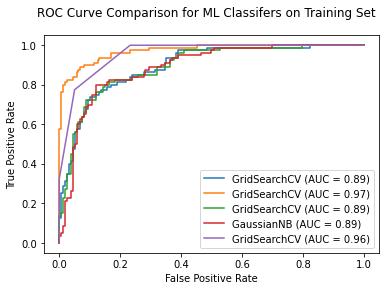

In [ ]:
# Create a ROC Curve
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

# Use fine-tuned models to plot ROC curve (except for Naive Bayes)

LRplot = plot_roc_curve(final_LR, X, y)
RFplot = plot_roc_curve(final_RF, X, y, ax=LRplot.ax_)
SVplot = plot_roc_curve(final_SVM, X, y, ax=LRplot.ax_)
NBplot = plot_roc_curve(NB, X, y, ax=LRplot.ax_)
KNNplot = plot_roc_curve(final_KNN, X, y, ax=LRplot.ax_)

LRplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Training Set')

plt.show()

# Test the data!

In [ ]:
# Test all the data! 

# Select and transform test data for transform

# drop labels for test set
df_test = strat_test_set.drop("DEATH_EVENT", axis=1) 
df_test_labels = strat_test_set["DEATH_EVENT"].copy()

# df_transformed_test is the full feature set, ready to use.
df_transformed_test = full_pipeline.fit_transform(df_test)

# The arrays passed to models.
X_test = df_transformed_test
y_test = df_test_labels
assert(X.shape[0] == y.shape[0])

In [ ]:
def evaluate_model(model, X_test, y_test):
  """Evaluates a pre-trained model on a test set."""
  # Training accuracy
  print("Predicting using test set...")
  y_pred = model.predict(X_test)
  print("")
  print("Classification report (test set):")
  print(classification_report(y_test, y_pred))

In [ ]:
# Test the models 
print("LR Test Accuracy Results")
evaluate_model(final_LR, X_test, y_test)

print("RF Test Accuracy Results")
evaluate_model(final_RF, X_test, y_test)

print("SVC Test Accuracy Results")
evaluate_model(final_SVM, X_test, y_test)

print("NB Test Accuracy Results")
evaluate_model(NB, X_test, y_test)

print("KNN Test Accuracy Results")
evaluate_model(final_KNN, X_test, y_test)


LR Test Accuracy Results
Predicting using test set...

Classification report (test set):
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.71      0.75      0.73        16

    accuracy                           0.85        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.85      0.85      0.85        60

RF Test Accuracy Results
Predicting using test set...

Classification report (test set):
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.60      0.75      0.67        16

    accuracy                           0.80        60
   macro avg       0.75      0.78      0.76        60
weighted avg       0.82      0.80      0.81        60

SVC Test Accuracy Results
Predicting using test set...

Classification report (test set):
              precision    recall  f1-score   support

           0       0.90

**Test Set Accuracy Scores**:

Logistic Regression Model: 85%

Random Forest Classifier: 80%

Support Vector Machine: 82%

Naive Bayes Model: 75%

K-Nearest Neighbors: 78%



**Create a ROC plot that shows all the ML classifier's performance on the test set and compare test set accuracy scores.** 

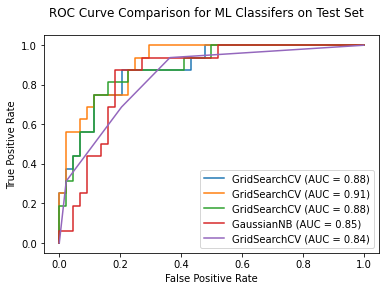

In [ ]:
# Plot the test data using ROC curve

# Create a ROC Curve
from sklearn import metrics
from sklearn.metrics import plot_roc_curve

LRplot = plot_roc_curve(final_LR, X_test, y_test)
RFplot = plot_roc_curve(final_RF, X_test, y_test, ax=LRplot.ax_)
SVplot = plot_roc_curve(final_SVM, X_test, y_test, ax=LRplot.ax_)
NBplot = plot_roc_curve(NB, X_test, y_test, ax=LRplot.ax_)
KNNplot = plot_roc_curve(final_KNN, X_test, y_test, ax=LRplot.ax_)

LRplot.figure_.suptitle('ROC Curve Comparison for ML Classifers on Test Set')

plt.show()

The model with the highest AUC score is random forest at 91%. It is the highest performing model in the test set and is mostly successful at classifying patients who survive or die. 

# Challenges Faced
• Small dataset: only 299 patients
  • Made adjustments to training set by decreasing the number of features included
  • With only 60 examples, the test set might be too small to meaningfully compare the models with much confidence.
# Lessons Learned
• Random Forest is the highest performing model in the test set • However, it also exhibits overfitting. It is still mostly successful at
classifying patients who survive or die.
  • The small test set size means we can’t compare models with much confidence.